In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("bottle.csv")

/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
data.shape

(864863, 74)

In [14]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
num_data = data.loc[:,'Depthm':'O2Satq']

In [16]:
df2 = data.loc[:,'R_PRES']
df2.head()

0     0
1     8
2    10
3    19
4    20
Name: R_PRES, dtype: int64

In [17]:
num_data['R_PRES'] = df2

In [18]:
num_data.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,R_PRES
0,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,0
1,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,8
2,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,10
3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,19
4,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,20


In [19]:
num_data.drop(['Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'O2Satq',  'P_qual','O_qual','SThtaq','O2Sat'], axis= 1, inplace= True)

In [20]:
num_data

,Depthm,T_degC,Salnty,O2ml_L,STheta,R_PRES
0,0,10.500,33.4400,NaN,25.64900,0
1,8,10.460,33.4400,NaN,25.65600,8
2,10,10.460,33.4370,NaN,25.65400,10
3,19,10.450,33.4200,NaN,25.64300,19
4,20,10.450,33.4210,NaN,25.64300,20
...,...,...,...,...,...,...
864858,0,18.744,33.4083,5.805,23.87055,0
864859,2,18.744,33.4083,5.805,23.87072,2
864860,5,18.692,33.4150,5.796,23.88911,5
864861,10,18.161,33.4062,5.816,24.01426,10


In [21]:
num_data.isnull().sum()

Depthm         0
T_degC     10963
Salnty     47354
O2ml_L    168662
STheta     52689
R_PRES         0
dtype: int64

/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fillna with mean')

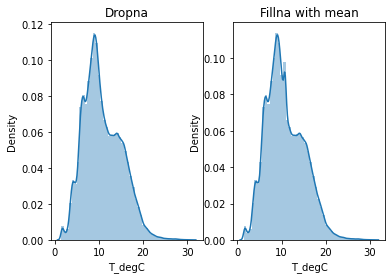

In [22]:
fig, ax=plt.subplots(1,2)
sns.distplot(num_data.T_degC.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(num_data.T_degC.fillna(num_data.T_degC.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

Text(0.5, 1.0, 'Fillna with mean')

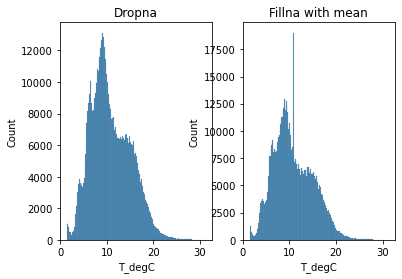

In [23]:
fig, ax=plt.subplots(1,2)
sns.histplot(num_data.T_degC.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.histplot(num_data.T_degC.fillna(num_data.T_degC.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [24]:
#decide to drop missing values for the temperature variable, to avoid spike by plugging in mean
num_data = num_data[num_data['T_degC'].notna()]
#decide to drop missing values from salinity variable, as it's dependent we don't care abt missing values
num_data = num_data[num_data['Salnty'].notna()]


In [25]:
num_data.isnull().sum()

Depthm         0
T_degC         0
Salnty         0
O2ml_L    152758
STheta      2073
R_PRES         0
dtype: int64

/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fillna with mean')

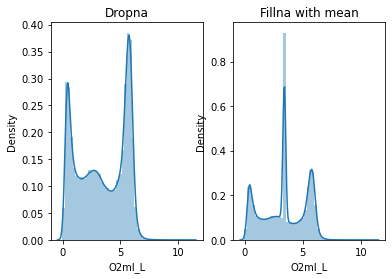

In [26]:
fig, ax=plt.subplots(1,2)
sns.distplot(num_data.O2ml_L.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(num_data.O2ml_L.fillna(num_data.O2ml_L.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

Text(0.5, 1.0, 'Fillna with mean')

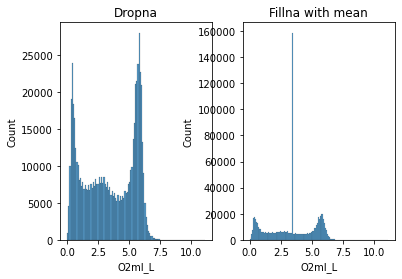

In [27]:
fig, ax=plt.subplots(1,2)
sns.histplot(num_data.O2ml_L.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.histplot(num_data.O2ml_L.fillna(num_data.O2ml_L.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [28]:
#decide to drop to avoid spike for O2ml_L variable
num_data = num_data[num_data['O2ml_L'].notna()]

/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fillna with mean')

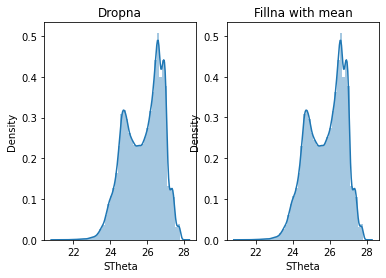

In [29]:
fig, ax=plt.subplots(1,2)
sns.distplot(num_data.STheta.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(num_data.STheta.fillna(num_data.STheta.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

Text(0.5, 1.0, 'Fillna with mean')

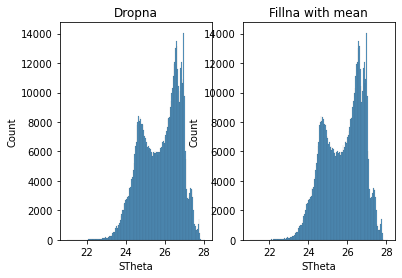

In [30]:
fig, ax=plt.subplots(1,2)
sns.histplot(num_data.STheta.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.histplot(num_data.STheta.fillna(num_data.STheta.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [31]:
#decide to fill in with mean as there is no spike to avoid
num_data['STheta'] = num_data['STheta'].fillna(num_data['STheta'].mean())

In [32]:
num_data.isnull().sum()

Depthm    0
T_degC    0
Salnty    0
O2ml_L    0
STheta    0
R_PRES    0
dtype: int64

In [33]:
split = (np.random.rand(len(num_data)) <= 0.8)
training = num_data[split]
testing = num_data[~split]

print(f"No. of training examples: {training.shape[0]}")
print(f"No. of testing examples: {testing.shape[0]}")

No. of training examples: 529089
No. of testing examples: 132400


In [34]:
training.describe()

,Depthm,T_degC,Salnty,O2ml_L,STheta,R_PRES
count,529089.000000,529089.000000,529089.000000,529089.000000,529089.000000,529089.000000
mean,219.834200,10.921990,33.832972,3.416808,25.797386,221.313681
std,311.515941,4.228857,0.460365,2.069790,1.010037,314.916652
min,0.000000,1.440000,29.402000,-0.010000,20.996000,0.000000
25%,49.000000,7.810000,33.480000,1.400000,24.940000,49.000000
50%,125.000000,10.160000,33.853000,3.470000,25.970000,126.000000
75%,300.000000,14.020000,34.185000,5.520000,26.634000,302.000000
max,5351.000000,31.140000,37.034000,11.130000,27.954000,5458.000000


In [35]:
testing.describe()

,Depthm,T_degC,Salnty,O2ml_L,STheta,R_PRES
count,132400.000000,132400.000000,132400.000000,132400.000000,132400.000000,132400.000000
mean,219.093142,10.906130,33.831523,3.416286,25.799864,220.565098
std,309.686689,4.208923,0.460254,2.064461,1.007056,313.076849
min,0.000000,1.460000,29.402000,-0.010000,21.511000,0.000000
25%,49.000000,7.800000,33.477000,1.419750,24.945000,49.000000
50%,125.000000,10.140000,33.853750,3.471000,25.978000,126.000000
75%,300.000000,13.980000,34.182000,5.510000,26.632000,301.000000
max,5351.000000,31.120000,36.633000,10.570000,28.083000,5458.000000


<AxesSubplot:>

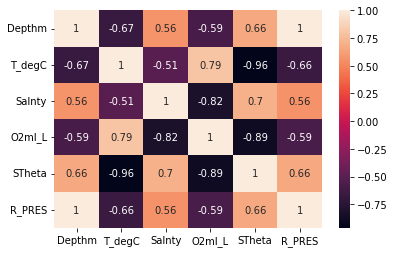

In [36]:
sns.heatmap(training.corr(), annot= True)

In [38]:
training.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,R_PRES
2160,0,10.30,33.030,5.90,25.364,0
2161,6,18.46,32.920,6.02,23.568,6
2162,10,10.29,32.951,6.04,25.304,10
2163,15,10.29,32.990,6.06,25.335,15
2165,30,10.39,33.054,6.01,25.368,30


In [39]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
ols_object = smf.ols(formula = 'T_degC~STheta', data = training)

In [40]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
ols_object = smf.ols(formula = 'T_degC~O2ml_L+Salnty+STheta', data = training)

In [41]:
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 T_degC   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.276e+07
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:48:37   Log-Likelihood:            -3.7732e+05
No. Observations:              529089   AIC:                         7.547e+05
Df Residuals:                  529085   BIC:                         7.547e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7862      0.104    278.127      0.000      28.583      28.989
O2ml_L         0.0785      0.001     86.313      0.000       0.077       0.080
Salnty         3.2154      0.003   1225.372      0.000       3.210       3.221
STheta        -4.9198      0.001  -3323.291      0.000      -4.923      -4.917
==============================================================================
Omnibus:                   160368.667   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8664503.973
Skew:                          -0.666   Prob(JB):                         0.00
Kurtosis:                      22.780   Cond. No.                     6.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
pred = model.predict(testing)

Text(0, 0.5, 'Predicted Temp')

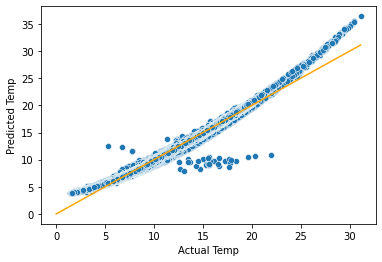

In [43]:
sns.scatterplot(x = testing.T_degC, y = pred)
#In case of a perfect prediction, all the points must lie on the line x = y.
sns.lineplot(x = [0,testing.T_degC.max()], y = [0,testing.T_degC.max()],color='orange') #Plotting the line x = y.
plt.xlabel('Actual Temp')
plt.ylabel('Predicted Temp')

In [44]:
###RMSE
np.sqrt(((testing.T_degC - pred)**2).mean())

0.4872407050137404

In [45]:
np.sqrt(model.mse_resid)

0.49372521287707555

Text(0, 0.5, 'Residual')

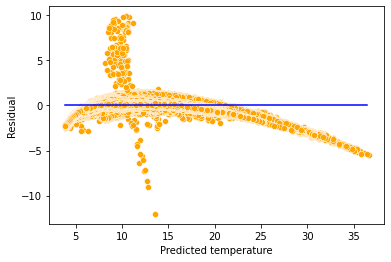

In [46]:
sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred.min(),pred.max()],y = [0,0],color = 'blue')
plt.xlabel('Predicted temperature')
plt.ylabel('Residual')

In [47]:
### end of multilinear regression model

In [48]:
### regression model 

In [49]:
import statsmodels.formula.api as sm
import time
import itertools

model = sm.ols('np.log(T_degC)~O2ml_L+Salnty+STheta', data = training).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(T_degC)   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                 1.239e+06
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:48:38   Log-Likelihood:             2.5582e+05
No. Observations:              529089   AIC:                        -5.116e+05
Df Residuals:                  529085   BIC:                        -5.116e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3666      0.031    299.464      0.000       9.305       9.428
O2ml_L        -0.0053      0.000    -19.143      0.000      -0.006      -0.005
Salnty         0.1268      0.001    159.884      0.000       0.125       0.128
STheta        -0.4392      0.000   -981.626      0.000      -0.440      -0.438
==============================================================================
Omnibus:                   316315.441   Durbin-Watson:                   0.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4808201.811
Skew:                          -2.611   Prob(JB):                         0.00
Kurtosis:                      16.815   Cond. No.                     6.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
training.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,R_PRES
2160,0,10.30,33.030,5.90,25.364,0
2161,6,18.46,32.920,6.02,23.568,6
2162,10,10.29,32.951,6.04,25.304,10
2163,15,10.29,32.990,6.06,25.335,15
2165,30,10.39,33.054,6.01,25.368,30


In [51]:
#Creating a set of predictors from which we need to find the best subset of predictors
X = training[['Depthm','Salnty', 'O2ml_L','STheta']]

In [52]:
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('np.log(T_degC)~' + '+'.join(predictor_subset),data = training).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [53]:
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    models = pd.DataFrame(results)

    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [54]:
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 4 models on 1 predictors in 0.37406420707702637 seconds.
Processed 6 models on 2 predictors in 0.7449228763580322 seconds.
Processed 4 models on 3 predictors in 0.6140580177307129 seconds.
Processed 1 models on 4 predictors in 0.1777942180633545 seconds.
Total elapsed time: 1.973823070526123 seconds.


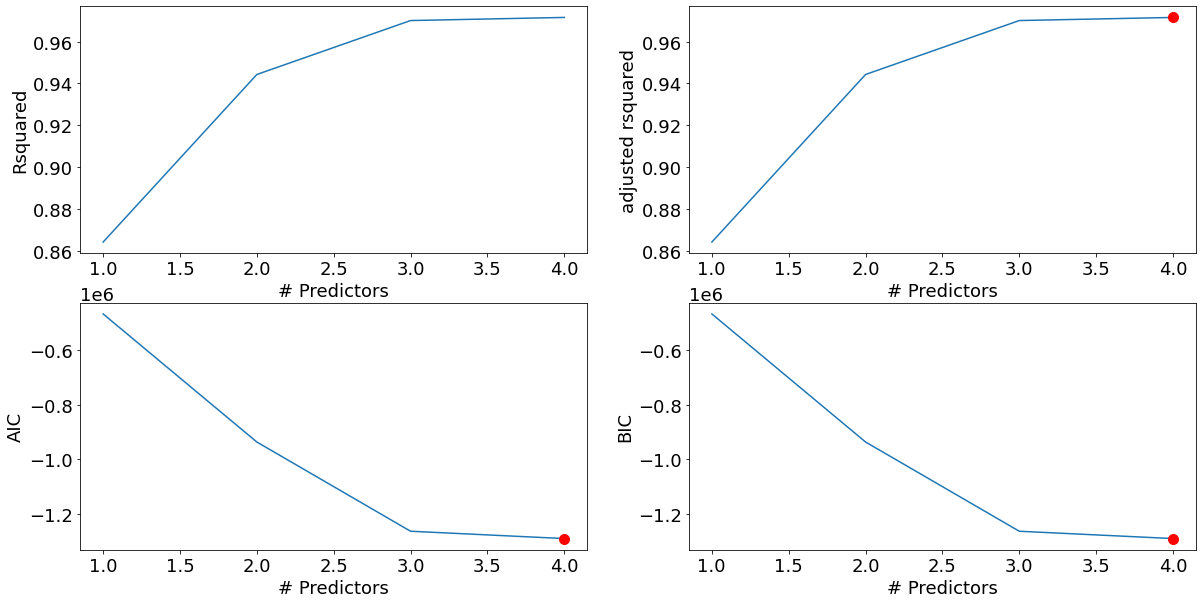

In [55]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [56]:
best = models_best.loc[4,'model']
models_best.loc[4,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(T_degC)   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 4.510e+06
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:48:41   Log-Likelihood:             6.4610e+05
No. Observations:              529089   AIC:                        -1.292e+06
Df Residuals:                  529084   BIC:                        -1.292e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8662      0.016    116.801      0.000       1.835       1.897
Depthm        -0.0006   4.34e-07  -1335.759      0.000      -0.001      -0.001
Salnty         0.2510      0.000    642.883      0.000       0.250       0.252
O2ml_L         0.0221      0.000    166.261      0.000       0.022       0.022
STheta        -0.3100      0.000  -1320.613      0.000      -0.311      -0.310
==============================================================================
Omnibus:                   188190.935   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10459448.072
Skew:                           0.925   Prob(JB):                         0.00
Kurtosis:                      24.703   Cond. No.                     6.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
pred = np.exp(best.predict(testing))
np.sqrt(((pred - testing.T_degC)**2).mean())

0.9730568446300785

In [58]:
model = sm.ols('np.log(T_degC)~' + '+'.join(X.columns),data = training).fit()
pred = np.exp(model.predict(testing))
np.sqrt(((pred - testing.T_degC)**2).mean())

0.9730568446300785

In [59]:
##same because the optimal model uses all the columns

In [60]:
X = training[['Depthm','Salnty', 'O2ml_L','STheta']]
#Since 'X' will change when we include interactions, we need a backup 
X_backup = training[['Depthm','Salnty', 'O2ml_L','STheta']]

In [61]:
for combo in itertools.combinations(X_backup.columns, 2):    
    training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
    testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
    X.loc[:,'_'.join(combo)] = training.loc[:,'_'.join(combo)] 

/var/folders/lh/3llxfnrj023ch1zt6kktj70c0000gn/T/ipykernel_17069/2212980609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
/var/folders/lh/3llxfnrj023ch1zt6kktj70c0000gn/T/ipykernel_17069/2212980609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is tryi

In [62]:
models_best = pd.DataFrame(columns=["Rsquared", "model"])

In [63]:
#attempted to do best subsets with two-factor interactions, however the kernel keeps dying 

In [64]:
#stepwise (forward) selection

In [65]:
def forward(predictors):
    remaining_predictors = [p for p in X.columns if p not in predictors]
    tic = time.time()
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    models = pd.DataFrame(results)
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    return best_model

In [66]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [67]:
models_best = forward_selection()

Processed  10 models on 1 predictors in 0.9289960861206055 seconds.
Processed  9 models on 2 predictors in 1.0864150524139404 seconds.
Processed  8 models on 3 predictors in 1.1875009536743164 seconds.
Processed  7 models on 4 predictors in 1.2220149040222168 seconds.
Processed  6 models on 5 predictors in 1.1951630115509033 seconds.
Processed  5 models on 6 predictors in 1.293855905532837 seconds.
Processed  4 models on 7 predictors in 1.1340899467468262 seconds.
Processed  3 models on 8 predictors in 0.9621419906616211 seconds.
Processed  2 models on 9 predictors in 0.7360548973083496 seconds.
Processed  1 models on 10 predictors in 0.4292440414428711 seconds.
Total elapsed time: 10.493994235992432 seconds.


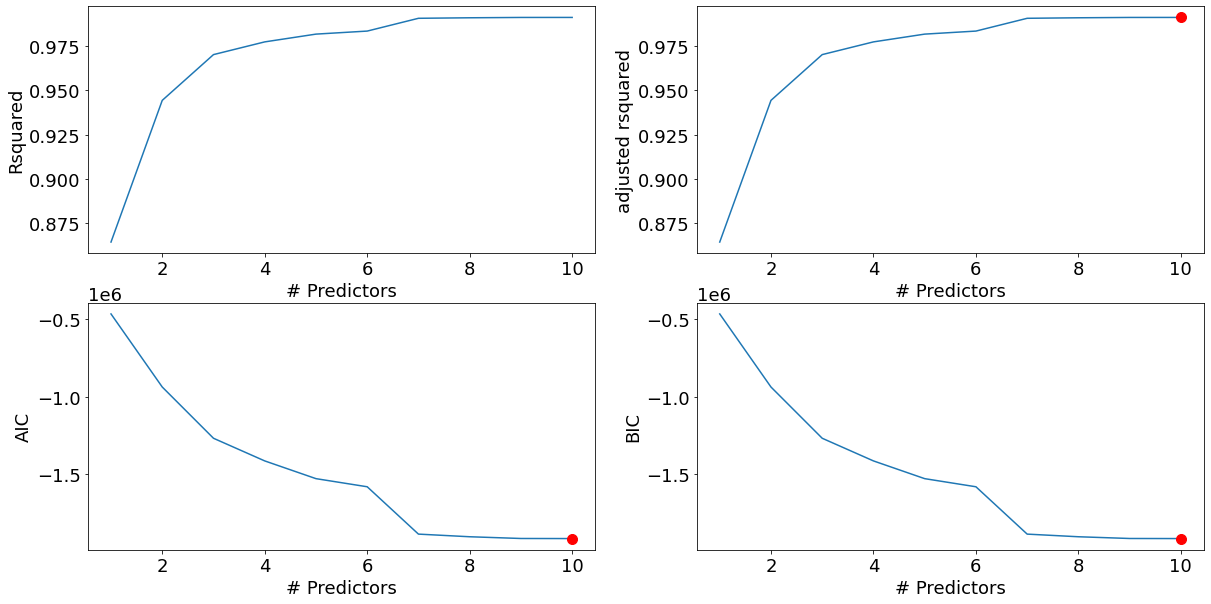

In [68]:
best_sub_plots()

In [69]:
best_fwd_reg_model = models_best['model'][10]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(T_degC)   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 5.989e+06
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:48:53   Log-Likelihood:             9.5821e+05
No. Observations:              529089   AIC:                        -1.916e+06
Df Residuals:                  529078   BIC:                        -1.916e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        41.7816      0.235    177.834      0.000      41.321      42.242
STheta           -1.8104      0.009   -193.876      0.000      -1.829      -1.792
Depthm_STheta    -0.0007   1.35e-06   -548.590      0.000      -0.001      -0.001
Salnty_STheta     0.0433      0.000    160.969      0.000       0.043       0.044
Depthm_O2ml_L  6.628e-05   2.59e-07    256.127      0.000    6.58e-05    6.68e-05
Salnty           -0.9013      0.007   -132.887      0.000      -0.915      -0.888
Depthm_Salnty     0.0014   2.62e-06    525.790      0.000       0.001       0.001
Depthm           -0.0279   6.32e-05   -441.440      0.000      -0.028      -0.028
O2ml_L_STheta     0.0118      0.000    113.459      0.000       0.012       0.012
Salnty_O2ml_L    -0.0053      0.000    -36.839      0.000      -0.006      -0.005
O2ml_L           -0.1102      0.005    -23.201      0.000      -0.120      -0.101
==============================================================================
Omnibus:                   642811.213   Durbin-Watson:                   0.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      13139778096.097
Skew:                          -4.976   Prob(JB):                         0.00
Kurtosis:                     774.968   Cond. No.                     7.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
pred_price = np.exp(best_fwd_reg_model.predict(testing))
np.sqrt(((pred_price - testing.T_degC)**2).mean())

0.5224526150946452

In [71]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
ols_object = smf.ols(formula = 'T_degC~STheta', data = training)

In [72]:
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 T_degC   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 6.937e+06
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:48:53   Log-Likelihood:            -8.1341e+05
No. Observations:              529089   AIC:                         1.627e+06
Df Residuals:                  529087   BIC:                         1.627e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.0339      0.040   2907.884      0.000     114.956     115.111
STheta        -4.0358      0.002  -2633.809      0.000      -4.039      -4.033
==============================================================================
Omnibus:                   152052.375   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           844898.080
Skew:                           1.274   Prob(JB):                         0.00
Kurtosis:                       8.642   Cond. No.                         661.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""